In [1]:
import os

import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from ezpadova import parsec
from scipy.ndimage import gaussian_filter

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic

from pyia import GaiaData
from helpers import make_cmd, get_MG_BPRP

coord.galactocentric_frame_defaults.set('v4.0');
galcen_frame = coord.Galactocentric()

In [2]:
# Gaia DR2 data for a 200pc side cube centered on the original pair:
g = GaiaData('../data/clump-200pc-cube.fits')

# TIC 27491137:
g1 = g[g.source_id == 1490845584382687232]

# TOI 1807:
g2 = g[g.source_id == 1476485996883837184]

In [3]:
c1 = g1.get_skycoord()
c2 = g2.get_skycoord()

In [4]:
c = g.get_skycoord()

mean_pair_x = 0.5 * (c1.cartesian.without_differentials() + 
                     c2.cartesian.without_differentials())
dx = c.cartesian.without_differentials() - mean_pair_x
dx_mask = dx.norm() < 60*u.pc

# Filter out bad astrometric solutions:
ruwe_mask = g.get_ruwe() < 1.4

In [5]:
clean_g = g[dx_mask & ruwe_mask]

In [6]:
len(clean_g)

38623

In [7]:
c_samples = clean_g.get_error_samples(size=128)

In [9]:
# np.std(c_samples.distance.value
d_err = np.std(c_samples.distance, axis=1)

In [12]:
d_err.shape

(38623,)

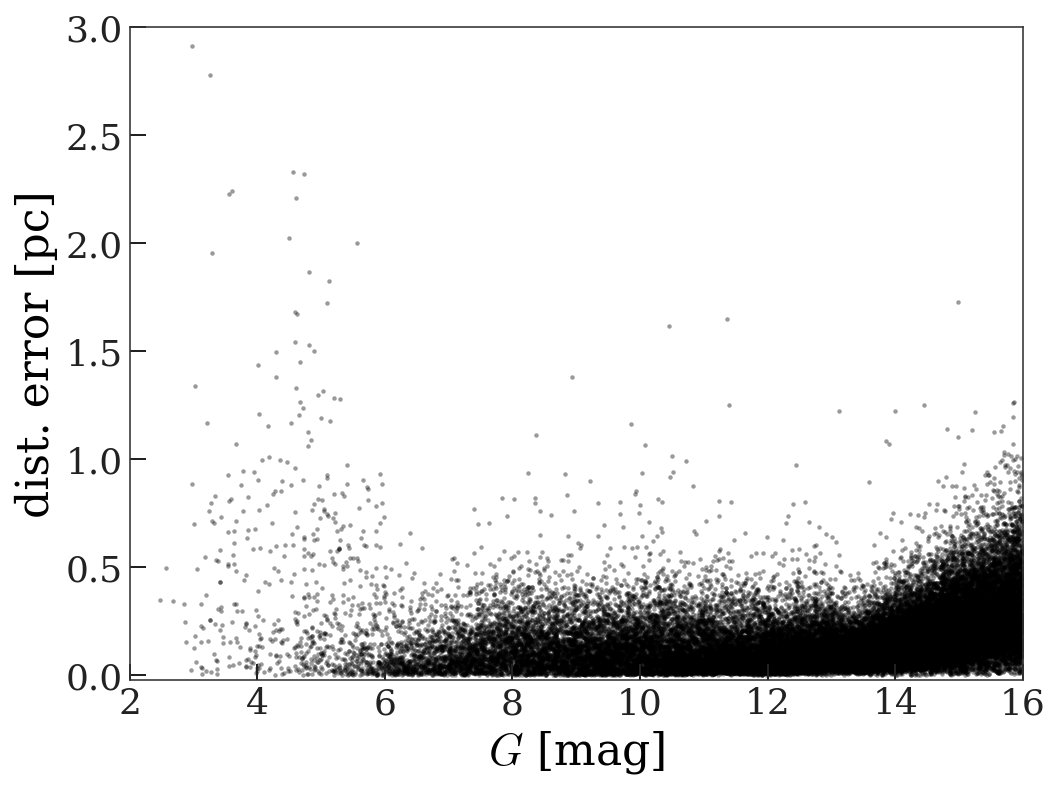

In [22]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(clean_g.phot_g_mean_mag.value, d_err.value,
            alpha=0.4, lw=0, s=5)

plt.xlabel('$G$ [mag]')
plt.ylabel('dist. error [pc]')

plt.xlim(2, 16)
plt.ylim(-0.02, 3)

fig.set_facecolor('w')